### Problema: Planificación de proyectos

![title](picture.png)

In [1]:
from multiprocessing import Pool
import matplotlib.pyplot as plt
from ipynb.fs.full.Functions import *

In [2]:
if __name__ == '__main__':
    lista = [10*i for i in range(1,100)]
    with Pool(processes = 8) as p:
        results = p.map(time_n, lista, chunksize = 1)
results

[(10, 0.002214059829711914, 22),
 (20, 0.0023537111282348634, 53),
 (30, 0.0023138093948364257, 80),
 (40, 0.002732691764831543, 128),
 (50, 0.0027725887298583984, 157),
 (60, 0.0034707307815551756, 241),
 (70, 0.0033310985565185545, 298),
 (80, 0.003889589309692383, 310),
 (90, 0.004368324279785157, 389),
 (100, 0.004009284973144531, 381),
 (110, 0.003969383239746094, 347),
 (120, 0.004128947257995606, 437),
 (130, 0.00424863338470459, 441),
 (140, 0.005325770378112793, 614),
 (150, 0.005285873413085938, 584),
 (160, 0.005984005928039551, 670),
 (170, 0.005744643211364746, 674),
 (180, 0.006562452316284179, 810),
 (190, 0.006303162574768067, 768),
 (200, 0.007539849281311035, 978),
 (210, 0.006382946968078613, 743),
 (220, 0.008357653617858887, 1057),
 (230, 0.006941452026367188, 832),
 (240, 0.00773930549621582, 892),
 (250, 0.009095687866210938, 988),
 (260, 0.00893608570098877, 1086),
 (270, 0.007878947257995605, 940),
 (280, 0.01007308006286621, 1286),
 (290, 0.008636918067932129,

In [3]:
T = []
N = []
A = []
for n, t, a in results:
    T.append(t)
    N.append(n)
    A.append(a)

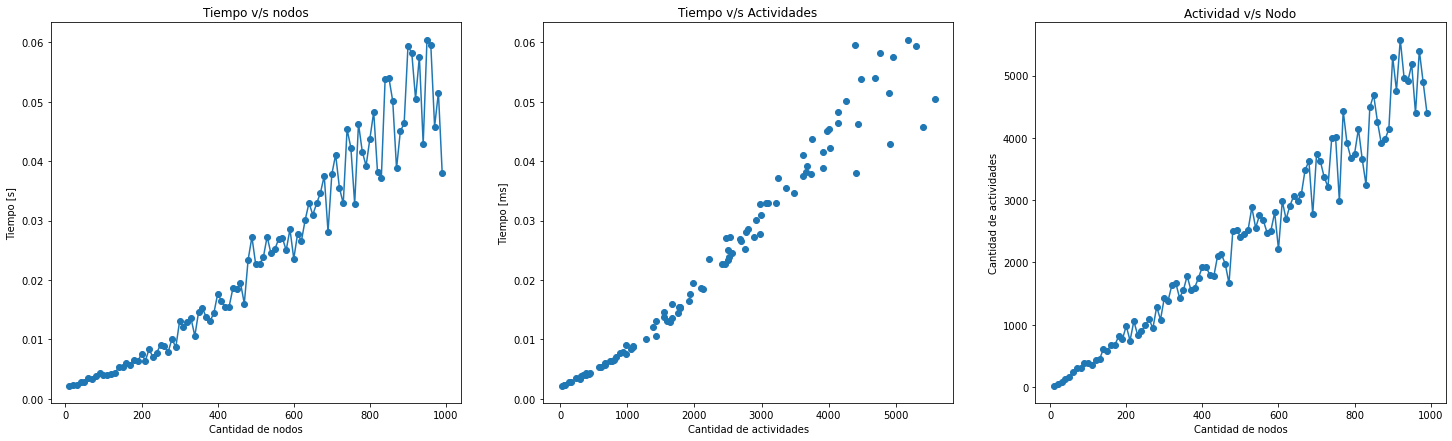

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
axes[0].plot(N, T)
axes[0].scatter(N, T)
axes[0].set_title("Tiempo v/s nodos")
axes[0].set_xlabel("Cantidad de nodos")
axes[0].set_ylabel("Tiempo [s]")

axes[1].scatter(A, T)
axes[1].set_title("Tiempo v/s Actividades")
axes[1].set_xlabel("Cantidad de actividades")
axes[1].set_ylabel("Tiempo [ms]")

axes[2].scatter(N, A)
axes[2].plot(N, A)
axes[2].set_title("Actividad v/s Nodo")
axes[2].set_ylabel("Cantidad de actividades")
axes[2].set_xlabel("Cantidad de nodos")
plt.show()

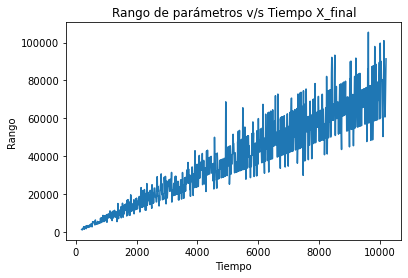

In [5]:
X_ = []
Y = []
for i in range(1000):
    problem, X, shape, b = generate_problem_2(15, rango_inf = -200-10*i, rango_sup = -150-10*i)
    val = problem.solve()
    X_.append(round(val,0))
    Y.append(200+10*i)
plt.plot(Y, X_)
plt.title("Rango de parámetros v/s Tiempo X_final")
plt.xlabel("Tiempo")
plt.ylabel("Rango")
plt.show()

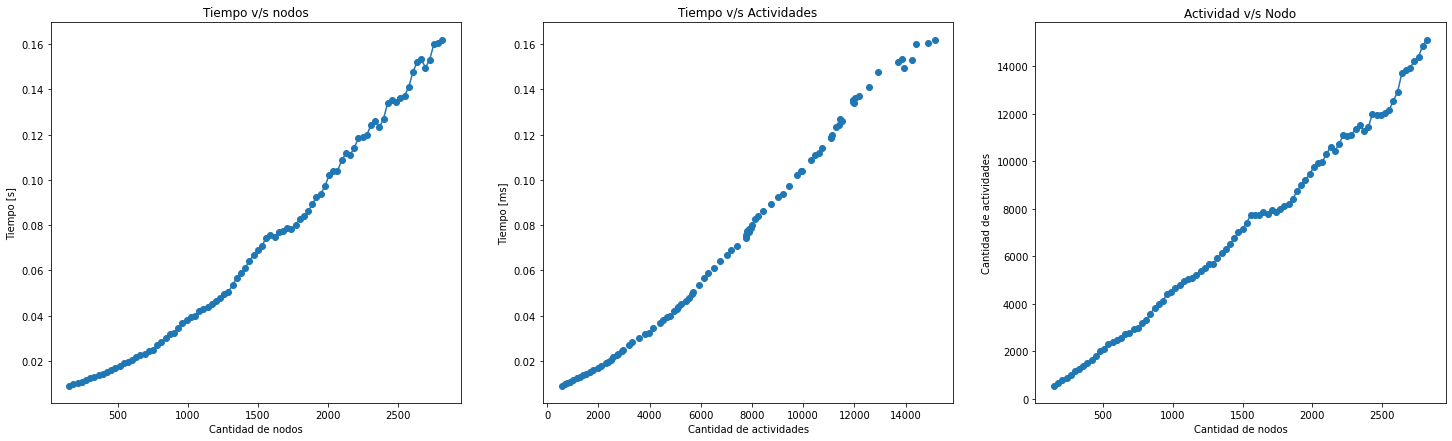

In [16]:
mean_T = []
mean_N = []
mean_A = []

step = 9

for i in range(len(T)-step):
    mean_T.append(sum(T[i:i+step])/3)
    mean_N.append(sum(N[i:i+step])/3)
    mean_A.append(sum(A[i:i+step])/3)
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
axes[0].plot(mean_N, mean_T)
axes[0].scatter(mean_N, mean_T)
axes[0].set_title("Tiempo v/s nodos")
axes[0].set_xlabel("Cantidad de nodos")
axes[0].set_ylabel("Tiempo [s]")

#axes[1].plot(mean_A, mean_T)
axes[1].scatter(mean_A, mean_T)
axes[1].set_title("Tiempo v/s Actividades")
axes[1].set_xlabel("Cantidad de actividades")
axes[1].set_ylabel("Tiempo [ms]")

axes[2].scatter(mean_N, mean_A)
axes[2].plot(mean_N, mean_A)
axes[2].set_title("Actividad v/s Nodo")
axes[2].set_ylabel("Cantidad de actividades")
axes[2].set_xlabel("Cantidad de nodos")
plt.show()

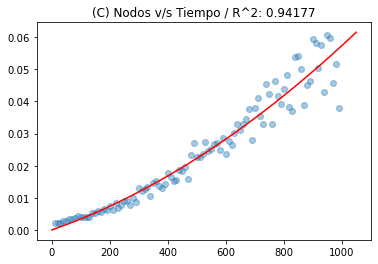

In [142]:
f_1 = lambda x,a,b,c : a+b*x+c*x**2

from scipy.optimize import curve_fit
import numpy as np

vals, _ = curve_fit(f_1, N, T, maxfev = 100000)

X = np.linspace(0,1050,50)
Y = []

for x in X:
    y = f_1(x, vals[0], vals[1], vals[2])
    Y.append(y)

residuals = np.array(residuals)
Y = np.array(Y)

plt.plot(X, Y, color = "r")
plt.scatter(N,T,alpha = 0.4)

f_is = []
for i in N:
    f_is.append(f_1(i,vals[0], vals[1], vals[2]))

f_is = np.array(f_is)

SST = np.sum((T - np.mean(T))**2)
SSReg = np.sum((f_is - np.mean(T))**2)

r_squared = SSReg/SST

plt.title(f"(C) Nodos v/s Tiempo / R^2: {round(r_squared, 5)}")
plt.show()

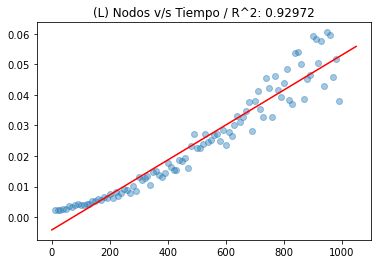

In [143]:
f_1 = lambda x,a,b: a+b*x

vals, _ = curve_fit(f_1, N, T, maxfev = 100000)

X = np.linspace(0,1050,50)
Y = []

for x in X:
    y = f_1(x, vals[0], vals[1])
    Y.append(y)

residuals = np.array(residuals)
Y = np.array(Y)

plt.plot(X, Y, color = "r")
plt.scatter(N,T,alpha = 0.4)

f_is = []
for i in N:
    f_is.append(f_1(i,vals[0], vals[1]))

f_is = np.array(f_is)

SST = np.sum((T - np.mean(T))**2)
SSReg = np.sum((f_is - np.mean(T))**2)

r_squared = SSReg/SST

plt.title(f"(L) Nodos v/s Tiempo / R^2: {round(r_squared, 5)}")
plt.show()

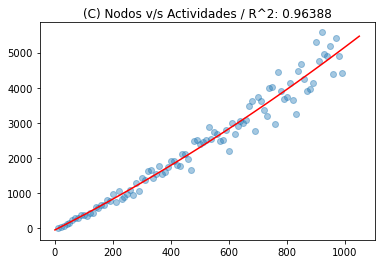

In [144]:
f_1 = lambda x,a,b,c : a+b*x+c*x**2

vals, _ = curve_fit(f_1, N, A, maxfev = 100000)

X = np.linspace(0,1050,50)
Y = []

for x in X:
    y = f_1(x, vals[0], vals[1], vals[2])
    Y.append(y)

residuals = np.array(residuals)
Y = np.array(Y)

plt.plot(X, Y, color = "r")
plt.scatter(N,A,alpha = 0.4)

f_is = []
for i in N:
    f_is.append(f_1(i,vals[0], vals[1], vals[2]))

f_is = np.array(f_is)

SST = np.sum((A - np.mean(A))**2)
SSReg = np.sum((f_is - np.mean(A))**2)

r_squared = SSReg/SST

plt.title(f"(C) Nodos v/s Actividades / R^2: {round(r_squared, 5)}")
plt.show()

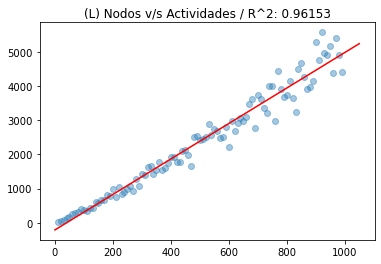

In [145]:
f_1 = lambda x,a,b : a+b*x

vals, _ = curve_fit(f_1, N, A, maxfev = 100000)

X = np.linspace(0,1050,50)
Y = []

for x in X:
    y = f_1(x, vals[0], vals[1])
    Y.append(y)

residuals = np.array(residuals)
Y = np.array(Y)

plt.plot(X, Y, color = "r")
plt.scatter(N,A,alpha = 0.4)

f_is = []
for i in N:
    f_is.append(f_1(i,vals[0], vals[1]))

f_is = np.array(f_is)

SST = np.sum((A - np.mean(A))**2)
SSReg = np.sum((f_is - np.mean(A))**2)

r_squared = SSReg/SST

plt.title(f"(L) Nodos v/s Actividades / R^2: {round(r_squared, 5)}")
plt.show()

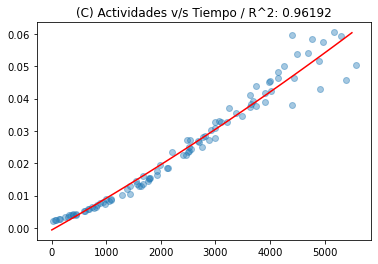

In [146]:
f_1 = lambda x,a,b,c : a+b*x+c*x**2

vals, _ = curve_fit(f_1, A, T)

X = np.linspace(0,5500,50)
Y = []

for x in X:
    y = f_1(x, vals[0], vals[1], vals[2])
    Y.append(y)

residuals = np.array(residuals)
Y = np.array(Y)

plt.plot(X, Y, color = "r")
plt.scatter(A,T,alpha = 0.4)

f_is = []
for i in A:
    f_is.append(f_1(i,vals[0], vals[1], vals[2]))

f_is = np.array(f_is)

SST = np.sum((T - np.mean(T))**2)
SSReg = np.sum((f_is - np.mean(T))**2)

r_squared = SSReg/SST

plt.title(f"(C) Actividades v/s Tiempo / R^2: {round(r_squared, 5)}")
plt.show()

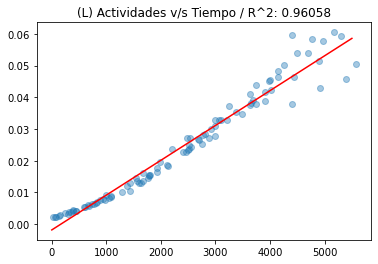

In [147]:
f_1 = lambda x,a,b : a+b*x

vals, _ = curve_fit(f_1, A, T, maxfev = 100000)

X = np.linspace(0,5500,50)
Y = []

for x in X:
    y = f_1(x, vals[0], vals[1])
    Y.append(y)

residuals = np.array(residuals)
Y = np.array(Y)

plt.plot(X, Y, color = "r")
plt.scatter(A,T,alpha = 0.4)

f_is = []
for i in A:
    f_is.append(f_1(i,vals[0], vals[1]))

f_is = np.array(f_is)

SST = np.sum((T - np.mean(T))**2)
SSReg = np.sum((f_is - np.mean(T))**2)

r_squared = SSReg/SST

plt.title(f"(L) Actividades v/s Tiempo / R^2: {round(r_squared, 5)}")
plt.show()